### Exercise 1

In [ ]:
import numpy as np


A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)

M = np.mean(A.T, axis=1)
print(M)

C = A - M
print(C)

print("covarience matrix")
V = np.cov(C.T)
print(V)

eig_values, eig_vectors = np.linalg.eig(V)
print("vectors")
print(eig_vectors)

print("values")
print(eig_values)

print("Transformed")
P = eig_vectors.T.dot(C.T)
print(P.T)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[4. 5. 6.]
[[-3. -3. -3.]
 [ 0.  0.  0.]
 [ 3.  3.  3.]]
covarience matrix
[[9. 9. 9.]
 [9. 9. 9.]
 [9. 9. 9.]]
vectors
[[-0.81649658  0.57735027  0.        ]
 [ 0.40824829  0.57735027 -0.70710678]
 [ 0.40824829  0.57735027  0.70710678]]
values
[ 0. 27.  0.]
[[ 1.11022302e-16 -5.19615242e+00  4.44089210e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-1.11022302e-16  5.19615242e+00 -4.44089210e-16]]


### Exercise 2

In [ ]:
from sklearn.decomposition import PCA

print(A)

pca = PCA(n_components=3)

pca.fit(A)

print(pca.components_)

print("eigen values")
print(pca.explained_variance_)

print("Transformed")
B = pca.transform(A)
print(B)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-0.57735027 -0.57735027 -0.57735027]
 [ 0.         -0.70710678  0.70710678]
 [ 0.81649658 -0.40824829 -0.40824829]]
eigen values
[27.  0.  0.]
Transformed
[[ 5.19615242e+00  4.44089210e-16  5.55111512e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-5.19615242e+00 -4.44089210e-16 -5.55111512e-16]]


### Exercise 3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [ ]:
df=pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

species         0
petal_width     0
petal_length    0
sepal_width     0
sepal_length    0
dtype: int64

In [ ]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
temp=[]
for i in df['species']:
  if i=='Iris-setosa':
    temp.append(0)
  elif i=='Iris-versicolor' :
    temp.append(1)
  else :
    temp.append(2)

df['species']=temp


In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x=df.drop(['species'],axis=1)

In [ ]:
y=df['species']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
accuracy=[]
for i in range(1,5):
  pca = PCA(n_components=i)

  pca.fit(x_data_scaled)

  #print(pca.components_)
  print(pca.explained_variance_ratio_)

  x_features = pca.transform(x_data_scaled)
  #print(x_features)
  X_train,X_test,y_train,y_test=train_test_split(x_features,y,test_size=0.2)
  model=GaussianNB().fit(X_train,y_train)
  accuracy.append(model.score(X_test,y_test))
  print("Accuracy using",i,"component in the feature table",accuracy[-1])
  print("------------*****-------------")


[0.72770452]
Accuracy using 1 component in the feature table 0.8666666666666667
------------*****-------------
[0.72770452 0.23030523]
Accuracy using 2 component in the feature table 0.8333333333333334
------------*****-------------
[0.72770452 0.23030523 0.03683832]
Accuracy using 3 component in the feature table 0.9333333333333333
------------*****-------------
[0.72770452 0.23030523 0.03683832 0.00515193]
Accuracy using 4 component in the feature table 0.8333333333333334
------------*****-------------


### Exercise 4

1. Highest accuracy is observed when we use 3 components for the PCA (for random state)

2. Explained_variance_ratio_ which helps us to find out the most important combination that we shall use in order to gain high accuraacy in the given iris dataset

3.

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'accuracy')

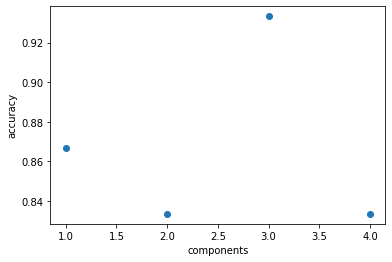

In [ ]:
plt.scatter([1,2,3,4],accuracy)
plt.xlabel("components")
plt.ylabel("accuracy")

4. So from the graph that we can get max accuracy when we use 3 components of PCA.